<a href="https://colab.research.google.com/github/rmpbastos/data_science/blob/master/_0010_Statistics_01_Mean%2C_Median_and_Mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python libraries used in this article
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm, norm

In [2]:
# set default matplotlib parameters
COLOR = '#ababab'
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['grid.color'] = COLOR
mpl.rcParams['grid.alpha'] = 0.1
mpl.rcParams['axes.edgecolor'] = COLOR

# Statistics #01 - Mean, Median, and Mode
### Understanding the three most common measures of central tendency

---
![Statistics](https://raw.githubusercontent.com/rmpbastos/data_science/master/img/isaac-smith-AT77Q0Njnt0-unsplash.jpg)

When people need to get the "average" of something, we usually add up all the numbers/items and divide by how many numbers/items there are. This is a simple definition of **mean**, but there are other types of "averages" or measures of central tendencies, and each of them has its uses, depending on what you want to achieve.

In this article, we'll talk about the three most common "averages", the **mean**, **median**, and **mode**, and how to use them.


## Mean

The mean, also represented by the Greek letter "**$\mu$**", is probably the most commonly used measure of central tendency. As said before, to calculate the mean of a group of numbers, we need to add them together and divide them by how many numbers there are. 

Imagine we have the list below, containing 5 numbers, and we need to find the mean of these numbers:
<br><br>
**5 | 10 | 15 | 15 | 25**
<br><br>
We can simply calculate:
<br><br>
$\mu = \frac{5 + 10 + 15 + 15 + 25}{5}$

$\mu = 14$
<br><br>
And we found that the mean is **14**. Notice that the mean doesn't need to be one of the values contained in the list.
<br><br>
To generalize, we can say that:
<br><br>
$\mu = \frac{x_1 + x_2 + x_3 + ... + x_n}{n}$
<br><br>
In the equation above, $n$ represents the number of objects, or the length, of the list, and $x_n$ represents the $n^{th}$ number in the list.

Another way to write this equation is using the math summation symbol $\sum$, replacing ${x_1 + x_2 + x_3 + ... + x_n}$ by $\sum{x}$:
<br><br>
$\mu = \frac{\sum{x}}{n}$
<br><br>
There is yet another way to represent the mean, considering the frequencies of values. Notice that in our list of five numbers **(5, 10, 15, 15, 25)**, the number **15** appears twice.

In a small list like ours, it may not make a big difference, but when we are dealing with hundreds of recurrent numbers, it's worth considering the frequency of each number. We just need to multiply each number by its frequency, adding the results together, and then divide the result by the sum of frequencies. To illustrate, let's check out the following equation.
<br><br>
$\mu = \frac{1\times 5+ 1\times 10 + 2\times 15 + 1\times 25}{1+1+2+1}$
<br><br>
To make it simple, we can rewrite the mean equation as:
<br><br>
$\mu = \frac{\sum{}fx}{\sum{f}}$
<br><br>
Where $\sum{}fx$ is the sum of the values multiplied by their frequencies, and $\sum{f}$ is the sum of the frequencies.

## Median

The median is the value right in the middle of a sequence. That's probably the most direct way to describe it. But let's take a closer look, and find out when it might be a good idea to take the median into account.

Suppose there is a room with 10 recent college graduates and we're surveying the average salary of former students who just got their first jobs.
The list below represents the salary of these individuals in ascending order.
<br><br>
**\$15,000 | \$15,000 | \$20,000 | \$20,000 | \$20,000 | \$25,000 | \$25,000 | \$30,000 | \$35,000 | \$200,000**
<br><br>
If we measure the mean of these values, we'll get **\$40,500** as the average graduate salary, as we can see in the histogram below. 

In [ ]:
salaries = [15000, 15000, 20000, 20000, 20000, 25000, 25000, 30000, 35000, 200000]


In [ ]:
salaries_df = pd.DataFrame(salaries, columns=["salaries"])

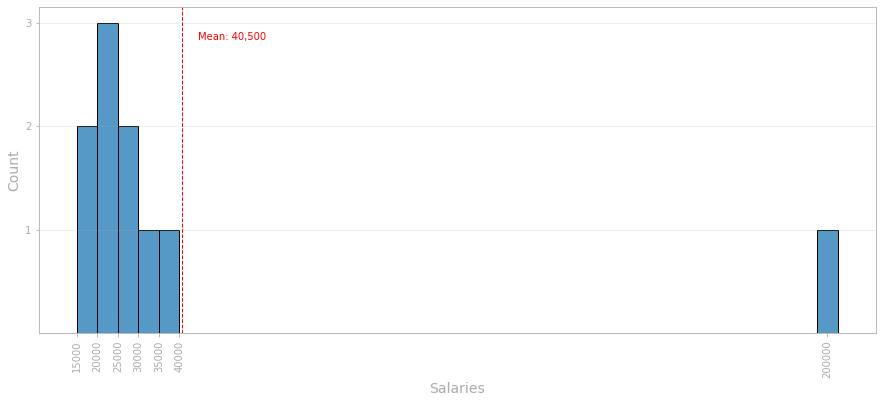

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.histplot(data=salaries_df, bins=37, legend=None)
plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000, 40000, 197500], labels=[15000, 20000, 25000, 30000, 35000, 40000, 200000], rotation=90)
plt.yticks(ticks=[1, 2, 3])
plt.xlabel("Salaries")
plt.grid(axis='y', alpha=0.25)
plt.axvline(x=int(pd.DataFrame.mean(salaries_df)), color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text((int(pd.DataFrame.mean(salaries_df)))*1.1, max_ylim*0.9, 'Mean: {:,.0f}'.format((int(pd.DataFrame.mean(salaries_df)))), color="r")

plt.show()

But notice that it does not represent the accurate reality, as \$40,500 is considerably higher than all wages, except for one. Why is it happening? Well, one lucky person earns **\$200,000** a year and is distorting our evaluation.

Looking at the histogram above, it's clear that most of the values are concentrated around 20,000 to 30,000, roughly. However, there is one value that is incompatible with the others. The $200,000 salary is extreme compared to the wages of the other individuals in the room and can be called an **outlier**.

One of the problems with outliers is that it messes with the mean. The red dashed line in the histogram represents the mean salary in the room, $40,500, a value that is higher than 9 out of the 10 salaries in our list. The outlier is pushing the mean upwards.

In cases like this, the median might give us a better picture of the data. Remember that the median is the value right in the middle of a sequence. Here, as we have an even number of values, the median will be the mean of the two middle numbers. Let's check it out.
<br><br>
**\$15,000 | \$15,000 | \$20,000 | \$20,000 | \$20,000 | \$25,000 | \$25,000 | \$30,000 | \$35,000 | \$200,000**


$Median = \frac{20,000 + 25,000}{2} = 22,500$

Observe that the median doesn't need to be one of the values contained in the list, just like the mean. However, if we had an odd set of values (let's assume we dropped the outlier and are left with 9 values), the median would be 20,000, the number right in the middle. Just remember that the numbers must be arranged in ascending order.

Let's draw the same histogram, but this time, the red dashed line represents de median of the 10 salaries.

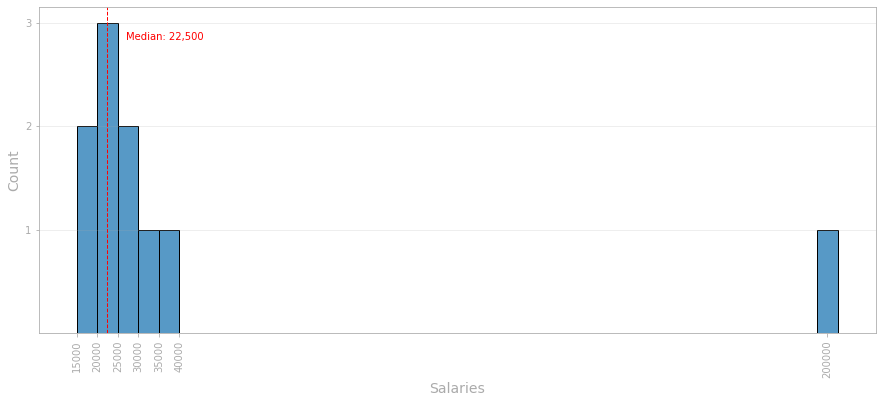

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.histplot(data=salaries_df, bins=37, legend=None)
#plt.xticks(ticks=[17500, 22500, 27500, 32500, 37500, 197500], labels=[15000, 20000, 25000, 30000, 35000, 200000], rotation=90)
plt.xticks(ticks=[15000, 20000, 25000, 30000, 35000, 40000, 197500], labels=[15000, 20000, 25000, 30000, 35000, 40000, 200000], rotation=90)
plt.yticks(ticks=[1, 2, 3])
plt.xlabel("Salaries")
plt.grid(axis='y', alpha=0.25)
plt.axvline(x=int(pd.DataFrame.median(salaries_df)), color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text((int(pd.DataFrame.median(salaries_df)))*1.2, max_ylim*0.9, 'Median: {:,.0f}'.format((int(pd.DataFrame.median(salaries_df)))), color="r")

plt.show()

Notice that, in this case, the median describes the average salary more accurately than the mean did.

# Mode

The mode can be simply described as the value (or values) that appears most frequently in a data set. Let's see how to identify the mode, and how it differs from the mean and median.

Consider the distribution below, containing 20 numbers.
<br><br>
**5 | 5 | 5 | 5 | 6 | 6 | 6 | 7 | 7 | 8 | 17 | 18 | 18 | 19 | 19 | 19 | 20 | 20 | 20 | 20**
<br><br>
Let's draw a histogram, to visualize the data set.

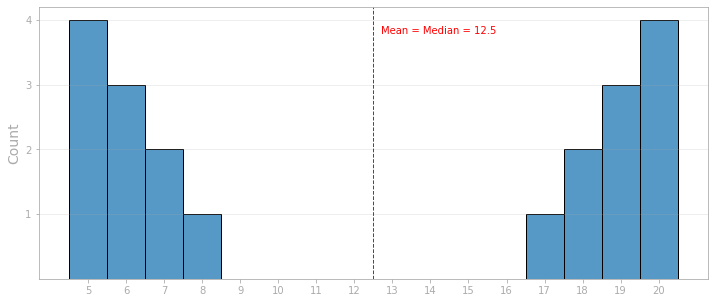

In [263]:
mode_list = [5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 17, 18, 18, 19, 19, 19, 21, 21, 21, 21]
mode_df = pd.DataFrame(mode_list)

fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(data=mode_df, bins=15, binwidth=1, legend=None)

plt.yticks(ticks=[1, 2, 3, 4])
#plt.xticks(ticks=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], labels=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
labels = [i for i in range(mode_list[0], mode_list[-1] + 1)]

plt.xticks(ticks=mids, labels=labels)
ax.set_xticks(mids)
plt.grid(axis='y', alpha=0.25)

plt.axvline(x=13, color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(int(mode_df.mean())*1.1, max_ylim*0.9, 'Mean = Median = 12.5', color="r")

plt.show()

Notice that we have a cluster of values around 5 and 8 and another cluster around 17 and 20. However, both the mean and the median are 12.5, far away from those values.

The mode, unlike the mean and median, **has** to be one of the values contained in the set. In the case above, we have two modes, **5 and 20**, because these are the most frequent values in the data set. We can say that our data is bimodal.
<br><br>
$Mode = 5\; and\; 20$



---





### Outliers and Skewed Data

To wrap it up, let's take a brief look at some graphs that illustrate what outliers can do to our data set.  

We already saw that outliers are extreme, abnormal observations in a data sample and they can distort the data. When this happens, we usually say that our data is **skewed**. It can be skewed to the right or the left, depending on whether the outliers are particularly high or low values.

Please take a look at the charts below.






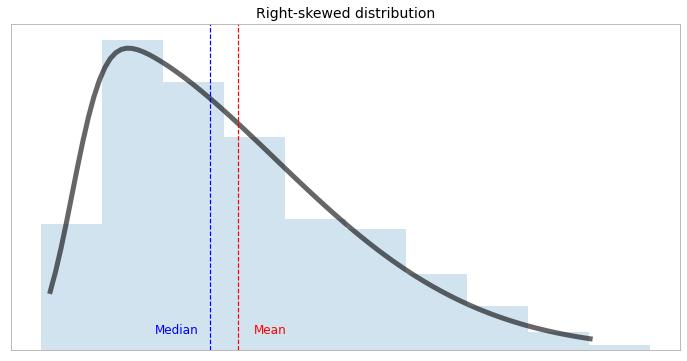

In [137]:
#Right-skewed distribution
fig, ax = plt.subplots(figsize=(12, 6))

a1 = 8

mean, var, skew, kurt = skewnorm.stats(a1, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.01, a1),
                skewnorm.ppf(0.99, a1), 100)
ax.plot(x, skewnorm.pdf(x, a1),
       'k-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.set_title('Right-skewed distribution', fontsize=14)
r = skewnorm.rvs(a1, size=500)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.axvline(x=np.mean(r), color='r', linestyle='dashed', linewidth=1.2)
ax.axvline(x=np.median(r), color='b', linestyle='dashed', linewidth=1.2)

min_ylim, max_ylim = ax.set_ylim()
ax.text(np.mean(r)*1.1, max_ylim*0.05, 'Mean', color='r', fontsize=12)
ax.text(np.median(r)*0.6, max_ylim*0.05, 'Median', color='b', fontsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

This is a right-skewed distribution and it happens when we have the presence of abnormal high values, distorting the mean to the right. When the data is skewed to the right, the mean will be greater than the median. The salary survey above is an example of right-skewed data.

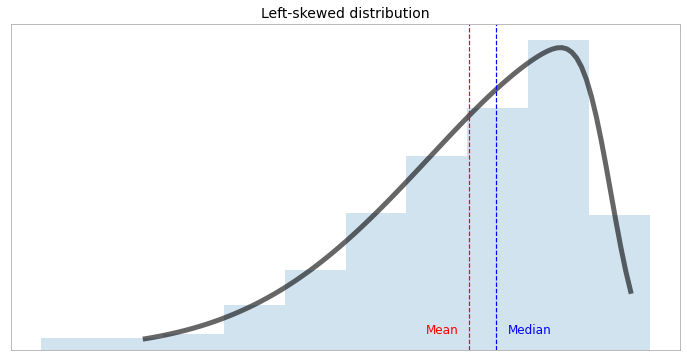

In [164]:
#Left-skewed distribution
fig, ax = plt.subplots(figsize=(12, 6))

a3 = -8

mean, var, skew, kurt = skewnorm.stats(a1, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.01, a3),
                skewnorm.ppf(0.99, a3), 100)
ax.plot(x, skewnorm.pdf(x, a3),
       'k-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.set_title('Left-skewed distribution', fontsize=14)
r3 = skewnorm.rvs(a3, size=500)
ax.hist(r3, density=True, histtype='stepfilled', alpha=0.2)
ax.axvline(x=np.mean(r3), color='r', linestyle='dashed', linewidth=1.2)
ax.axvline(x=np.median(r3), color='b', linestyle='dashed', linewidth=1.2)

min_ylim, max_ylim = ax.set_ylim()
ax.text(np.mean(r3)*1.3, max_ylim*0.05, 'Mean', color='r', fontsize=12)
ax.text(np.median(r3)*0.9, max_ylim*0.05, 'Median', color='b', fontsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

This chart represents a left-skewed distribution. It happens when we have the presence of abnormal low values, distorting the mean to the left. When the data is skewed to the left, the mean will be lower than the median.

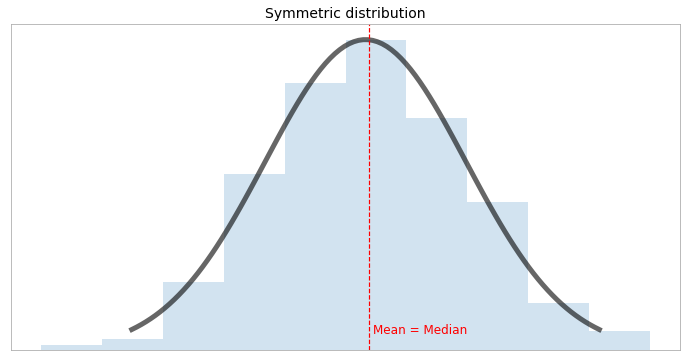

In [141]:
#Symmetric data
fig, ax = plt.subplots(figsize=(12, 6))

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'k-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title('Symmetric distribution', fontsize=14)
r2 = norm.rvs(size=1000)
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2)
ax.axvline(x=np.mean(r2), color='r', linestyle='dashed', linewidth=1.2)

min_ylim, max_ylim = ax.set_ylim()
ax.text(np.median(r2)*1.3, max_ylim*0.05, 'Mean = Median', color='r', fontsize=12)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

This last chart shows a symmetric distribution. When the data is symmetrical, no abnormal values are pulling the mean to the left or the right. This is a case where the mean, median, and mode have the same value.

# Conclusion

Of course, much more can be said about these topics, but I hope this article may help you understand the main differences between mean, median, and mode, as well as the concept of outliers and skewed data.

To summarize, let's review what we saw here:

#### **Mean**


*   Add up all the numbers and then divide by how many numbers there are. 

#### **Median**


*   In a set in ascending order, it's the value right in the middle.
*   If the set has an even number of values, add the two middle ones together, and divide them by two.

#### **Mode**



*   The most frequent value in a list.
*   A data set can have several modes.


1. *Griffiths, D. Head First Statistics: A Brain-Friendly Guide. O'Reilly, 2008.*
2. *NIST/SEMATECH e-Handbook of Statistical Methods, https://www.itl.nist.gov/div898/handbook/, 2012.*